### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. display 5 columns from dataset

In [2]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [3]:
#2

df.info()
#conclusion
# This code gives you a summary of your data, showing the
# types of data in each column and if any data is missing. This
# helps you understand the structure of your data and spot any
# potential problems, like missing information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [4]:
#3a
df['admission'].value_counts(dropna=False)

,count
admission,
NaN,5194
Admit,900
Waitlist,100


In [5]:
#3b
df['race'].value_counts(dropna=False)

,count
race,
NaN,1842
White,1456
Asian,1147
Black,916
Hispanic,596
Other,237


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [6]:
#4
df['admission'].fillna('Deny', inplace=True)
df['race'].fillna('Other', inplace=True)

<ipython-input-6-4c52867b0f1c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('Deny', inplace=True)
<ipython-input-6-4c52867b0f1c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

5. recheck missing value

In [7]:
#5
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [8]:
# 6
df = df.drop('application_id', axis=1)

7. show describe column and conclude what the insight is from that column

In [9]:
#7
df.describe()

#conclusion
# Kode tersebut memberikan ringkasan singkat tentang data numerik kita,
# seperti nilai rata-rata, tertinggi, dan terendah. Dari ringkasan ini,
# kita bisa mendapatkan gambaran umum tentang data dan melihat apakah ada
# data yang tidak biasa atau perlu diteliti lebih lanjut. Misalnya, kita
# bisa melihat rata-rata nilai GMAT atau lama pengalaman kerja.

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

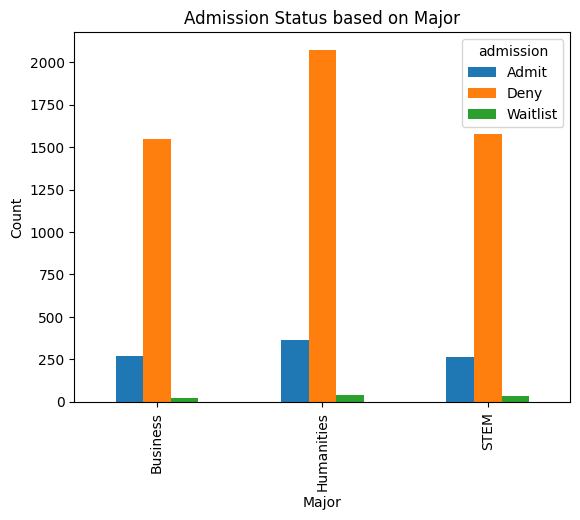

In [10]:
#8

# Create a cross-tabulation of major and admission status
ct = pd.crosstab(df['major'], df['admission'])

# Plot a stacked bar chart
ct.plot(kind='bar', stacked=False)
plt.title('Admission Status based on Major')
plt.xlabel('Major')
plt.ylabel('Count')
plt.show()


9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


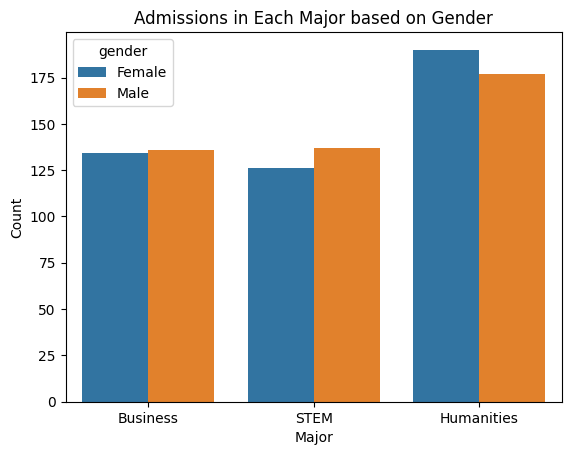

In [11]:
#9


# Create a grouped bar chart using seaborn
sns.countplot(x='major', hue='gender', data=df[df['admission'] == 'Admit'])
plt.title('Admissions in Each Major based on Gender')
plt.xlabel('Major')
plt.ylabel('Count')
plt.show()


10. create your own insightful visualization and explain it in at least 2 sentences

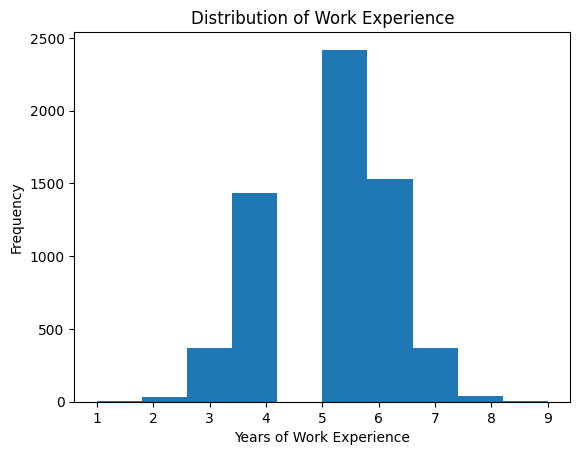

In [12]:
#10
plt.hist(df['work_exp'], bins=10)
plt.title('Distribution of Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Frequency')
plt.show()

# This code creates a histogram that shows the distribution
# of work experience among the applicants. This visualization provides
# insights into the range and frequency of work experience within
# the applicant pool, highlighting how many applicants have different
# levels of work experience. You can observe if there's a concentration
# of applicants with specific years of experience and understand the overall
# work experience profile of the applicants.

11. create your own insightful visualization and explain it in at least 2 sentences

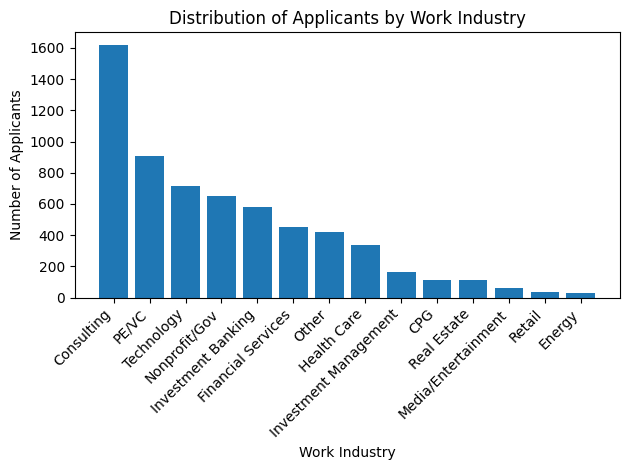

In [13]:
#11
work_industry_counts = df['work_industry'].value_counts()

plt.bar(work_industry_counts.index, work_industry_counts.values)
plt.title('Distribution of Applicants by Work Industry')
plt.xlabel('Work Industry')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# This code creates a bar chart that shows how many applicants
# come from each work industry. Each bar on the chart represents
# an industry, and the height of the bar shows the number of
# applicants from that industry. This helps us see which industries
# have the most and least applicants.

12. encode categorical columns and display the results

In [14]:
#12a
#encode X
X = df.drop('admission', axis=1)
y = df['admission']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['gender', 'international', 'major', 'race', 'work_industry']:
    df[col] = le.fit_transform(X[col])

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,Deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,Deny
4,1,0,3.35,2,2,590.0,5.0,1,Deny


In [15]:
#12b
#encode y
y_le = LabelEncoder()
df['admission'] = y_le.fit_transform(y)



In [16]:
df

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,1
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,1
4,1,0,3.35,2,2,590.0,5.0,1,1
...,...,...,...,...,...,...,...,...,...
6189,1,0,3.49,0,4,640.0,5.0,9,1
6190,1,0,3.18,2,1,670.0,4.0,1,1
6191,0,1,3.22,0,3,680.0,5.0,4,0
6192,1,1,3.36,0,3,590.0,5.0,9,1


13. create a heatmap to see the correlation and explain the conclusion

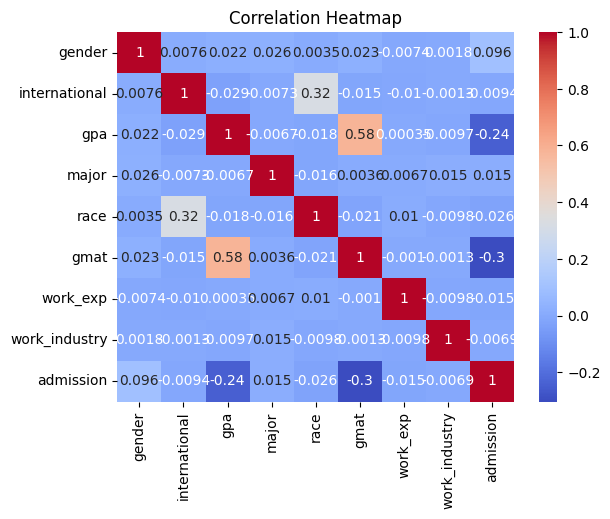

In [17]:
#13


corr = df.corr()
# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#Conclusion
# This code creates a colorful chart that shows how different
# factors in our data are related. By looking at the colors and
# numbers on the chart, we can see which factors tend to move
# together and which ones don't. For example, we might see that
# people with higher GPAs also tend to have higher GMAT scores.
# This helps us understand how different things are connected in our data.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target variable (y)
X = df.drop('admission', axis=1)
y = df['admission']

# Create Lisa's data
lisa_data = pd.DataFrame({
    'gender': ['Female'],
    'international': [False],
    'gpa': [df['gpa'].mean()],
    'major': ['Entrepreneurship'],  # Assuming Entrepreneurship is a major
    'race': ['Asian'],
    'gmat': [580],
    'work_exp': [2],
    'work_industry': ['Finance']
})

# Concatenate Lisa's data with the original data for encoding
X_combined = pd.concat([X, lisa_data], ignore_index=True)

# Ensure boolean values are converted to integers (0/1)
X_combined['international'] = X_combined['international'].astype(int)

# Encode categorical features in X_combined
le_gender = LabelEncoder()
le_major = LabelEncoder()
le_race = LabelEncoder()
le_work_industry = LabelEncoder()

X_combined['gender'] = le_gender.fit_transform(X_combined['gender'].astype(str))
X_combined['major'] = le_major.fit_transform(X_combined['major'].astype(str))
X_combined['race'] = le_race.fit_transform(X_combined['race'].astype(str))
X_combined['work_industry'] = le_work_industry.fit_transform(X_combined['work_industry'].astype(str))

# Split the combined data back into X and lisa_data
X = X_combined[:-1]
lisa_data = X_combined[-1:]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make prediction for Lisa
lisa_prediction = model.predict(lisa_data)

# Decode the prediction
if lisa_prediction[0] == 1:
    print("Prediction for Lisa: Admit")
else:
    print("Prediction for Lisa: Deny")

# Evaluate the model (Accuracy)
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Prediction for Lisa: Admit
Accuracy: 0.8353510895883777
